# Transportstatistikk

In [1]:
from pyjstat import pyjstat
import requests
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Innenlandsk persontransport 1965-2022

### API spørring

In [2]:
POST_URL = 'https://data.ssb.no/api/v0/no/table/03982'

# API spørring, kan tas fra Konsoll  
payload = {
  "query": [
    {
      "code": "PersonTrans",
      "selection": {
        "filter": "all",
        "values": [
          "*"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "all",
        "values": [
            "*"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "all",
        "values": [
            "*"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

### Få resultat fra APIen og lagre som pandas dataframe

In [ ]:
# Post spørring og få Pandas dataframe i retur
# benytter biblioteket pyjstat for JSON-stat

resultat = requests.post(POST_URL, json = payload)
# Resultat gir bare http statuskode - 200 hvis OK. Body ligger i resultat.text
print(resultat)


dataset = pyjstat.Dataset.read(resultat.text)
df = dataset.write('dataframe')
df.to_pickle("person.pkl")


### Lese in pandas dataframe

In [2]:
df = pd.read_pickle("person.pkl")

### Sjekke ting

In [3]:
df.head()

,transport,statistikkvariabel,år,value
0,Persontransport i alt,Passasjerer (mill.),1965,1316.0
1,Persontransport i alt,Passasjerer (mill.),1970,1847.0
2,Persontransport i alt,Passasjerer (mill.),1975,2320.0
3,Persontransport i alt,Passasjerer (mill.),1980,2628.0
4,Persontransport i alt,Passasjerer (mill.),1985,3385.0


In [4]:
print(df['år'].unique())
print(df['transport'].unique())
print(df['statistikkvariabel'].unique())

['1965' '1970' '1975' '1980' '1985' '1990' '1995' '1996' '1997' '1998'
 '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008'
 '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018'
 '2019' '2020' '2021' '2022']
['Persontransport i alt' 'Sjøtransport' 'Bilferjeruter' 'Annen rutefart'
 'Skinnegående transport' 'Alle togstrekninger' 'Norges Statsbaner'
 'Andre jernbaner' 'Forstadsbaner og sporveier' 'Veitransport'
 'Rutebusser' 'Drosjer' 'Utleiebiler mv.' 'Personbiler'
 'Motorsykler, mopeder' 'Lufttransport' 'Lufttransport innenriksreiser'
 'Lufttransport mellom norske flyplasser som del av utenlandsreise']
['Passasjerer (mill.)' 'Passasjerkilometer (mill.)']


In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transport           1224 non-null   object 
 1   statistikkvariabel  1224 non-null   object 
 2   år                  1224 non-null   object 
 3   value               1076 non-null   float64
dtypes: float64(1), object(3)
memory usage: 38.4+ KB
None
              value
count   1076.000000
mean    6461.571561
std    16897.808816
min        0.000000
25%       64.500000
50%      457.000000
75%     3423.250000
max    82496.000000


In [6]:
# Sjekke NaN verdier
print(df[df.isna().any(axis=1)])
print(df[df.isna().any(axis=1)]['transport'].unique())

                                              transport  \
340                                 Alle togstrekninger   
341                                 Alle togstrekninger   
342                                 Alle togstrekninger   
343                                 Alle togstrekninger   
344                                 Alle togstrekninger   
...                                                 ...   
1203  Lufttransport mellom norske flyplasser som del...   
1204  Lufttransport mellom norske flyplasser som del...   
1205  Lufttransport mellom norske flyplasser som del...   
1206  Lufttransport mellom norske flyplasser som del...   
1207  Lufttransport mellom norske flyplasser som del...   

              statistikkvariabel    år  value  
340          Passasjerer (mill.)  1965    NaN  
341          Passasjerer (mill.)  1970    NaN  
342          Passasjerer (mill.)  1975    NaN  
343          Passasjerer (mill.)  1980    NaN  
344          Passasjerer (mill.)  1985    NaN  
...

### Passasjerer

In [7]:
df_pass=df[df["statistikkvariabel"]=="Passasjerer (mill.)"]
df_pass=df_pass.pivot(index='år', columns='transport', values='value')


In [8]:
df_pass.head()

transport,Alle togstrekninger,Andre jernbaner,Annen rutefart,Bilferjeruter,Drosjer,Forstadsbaner og sporveier,Lufttransport,Lufttransport innenriksreiser,Lufttransport mellom norske flyplasser som del av utenlandsreise,"Motorsykler, mopeder",Norges Statsbaner,Personbiler,Persontransport i alt,Rutebusser,Sjøtransport,Skinnegående transport,Utleiebiler mv.,Veitransport
år,,,,,,,,,,,,,,,,,,
1965,NaN,0.0,8.0,17.0,52.0,103.0,1.0,NaN,NaN,100.0,34.0,693.0,1316.0,308.0,25.0,137.0,0.0,1153.0
1970,NaN,0.0,8.0,28.0,53.0,91.0,1.0,NaN,NaN,87.0,29.0,1227.0,1847.0,323.0,36.0,120.0,0.0,1690.0
1975,NaN,0.0,8.0,36.0,59.0,89.0,2.0,NaN,NaN,75.0,33.0,1708.0,2320.0,310.0,44.0,122.0,0.0,2152.0
1980,NaN,0.0,8.0,43.0,71.0,95.0,3.0,NaN,NaN,63.0,37.0,1976.0,2628.0,332.0,51.0,132.0,0.0,2442.0
1985,NaN,0.0,7.0,45.0,62.0,85.0,5.0,NaN,NaN,79.0,34.0,2753.0,3385.0,289.0,52.0,119.0,26.0,3209.0


In [9]:
df_pass.describe()

transport,Alle togstrekninger,Andre jernbaner,Annen rutefart,Bilferjeruter,Drosjer,Forstadsbaner og sporveier,Lufttransport,Lufttransport innenriksreiser,Lufttransport mellom norske flyplasser som del av utenlandsreise,"Motorsykler, mopeder",Norges Statsbaner,Personbiler,Persontransport i alt,Rutebusser,Sjøtransport,Skinnegående transport,Utleiebiler mv.,Veitransport
count,4.000000,30.000000,34.000000,34.000000,34.000000,34.000000,34.000000,16.000000,16.000000,34.000000,30.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,57.500000,4.366667,9.147059,38.588235,60.147059,118.617647,9.617647,9.875000,2.125000,136.500000,48.300000,3571.794118,4409.647059,330.352941,47.705882,171.852941,81.794118,4180.558824
std,18.806027,3.295591,1.417047,5.768870,11.209121,32.000961,3.651606,1.408309,1.087811,34.458803,10.485293,933.354451,1050.481647,34.747472,6.501885,44.885803,43.357415,1011.712206
min,41.000000,0.000000,7.000000,17.000000,35.000000,81.000000,1.000000,6.000000,1.000000,63.000000,29.000000,693.000000,1316.000000,278.000000,25.000000,115.000000,0.000000,1153.000000
25%,42.500000,0.000000,8.000000,36.250000,52.000000,95.500000,8.250000,10.000000,1.000000,103.250000,42.000000,3299.250000,4056.750000,310.500000,45.250000,138.750000,69.500000,3860.750000
50%,54.500000,5.000000,9.000000,39.500000,58.000000,104.500000,10.000000,10.000000,2.000000,145.500000,48.500000,3823.000000,4638.000000,323.500000,48.500000,157.500000,91.500000,4437.000000
75%,69.500000,7.000000,10.000000,43.000000,70.750000,138.500000,12.750000,11.000000,3.000000,164.750000,51.000000,4144.500000,5152.750000,339.500000,52.000000,199.500000,108.250000,4829.500000
max,80.000000,8.000000,12.000000,47.000000,77.000000,192.000000,14.000000,11.000000,4.000000,179.000000,69.000000,4630.000000,5672.000000,434.000000,56.000000,272.000000,161.000000,5359.000000


In [34]:
#df_pass['Skinnegående transport']+df_pass['Lufttransport']+df_pass['Veitransport']+df_pass['Sjøtransport']==df_pass['Persontransport i alt']

In [18]:
print(df_pass['Skinnegående transport']+df_pass['Lufttransport']+df_pass['Veitransport']+df_pass['Sjøtransport']-df_pass['Persontransport i alt'])

år
1965    0.0
1970    0.0
1975    0.0
1980    0.0
1985    0.0
1990    0.0
1995    0.0
1996   -1.0
1997    0.0
1998    1.0
1999   -1.0
2000    0.0
2001    1.0
2002    1.0
2003    1.0
2004   -1.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    1.0
2010    0.0
2011    1.0
2012    0.0
2013   -1.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019   -1.0
2020    1.0
2021    0.0
2022    1.0
dtype: float64


<Axes: xlabel='år', ylabel='Lufttransport'>

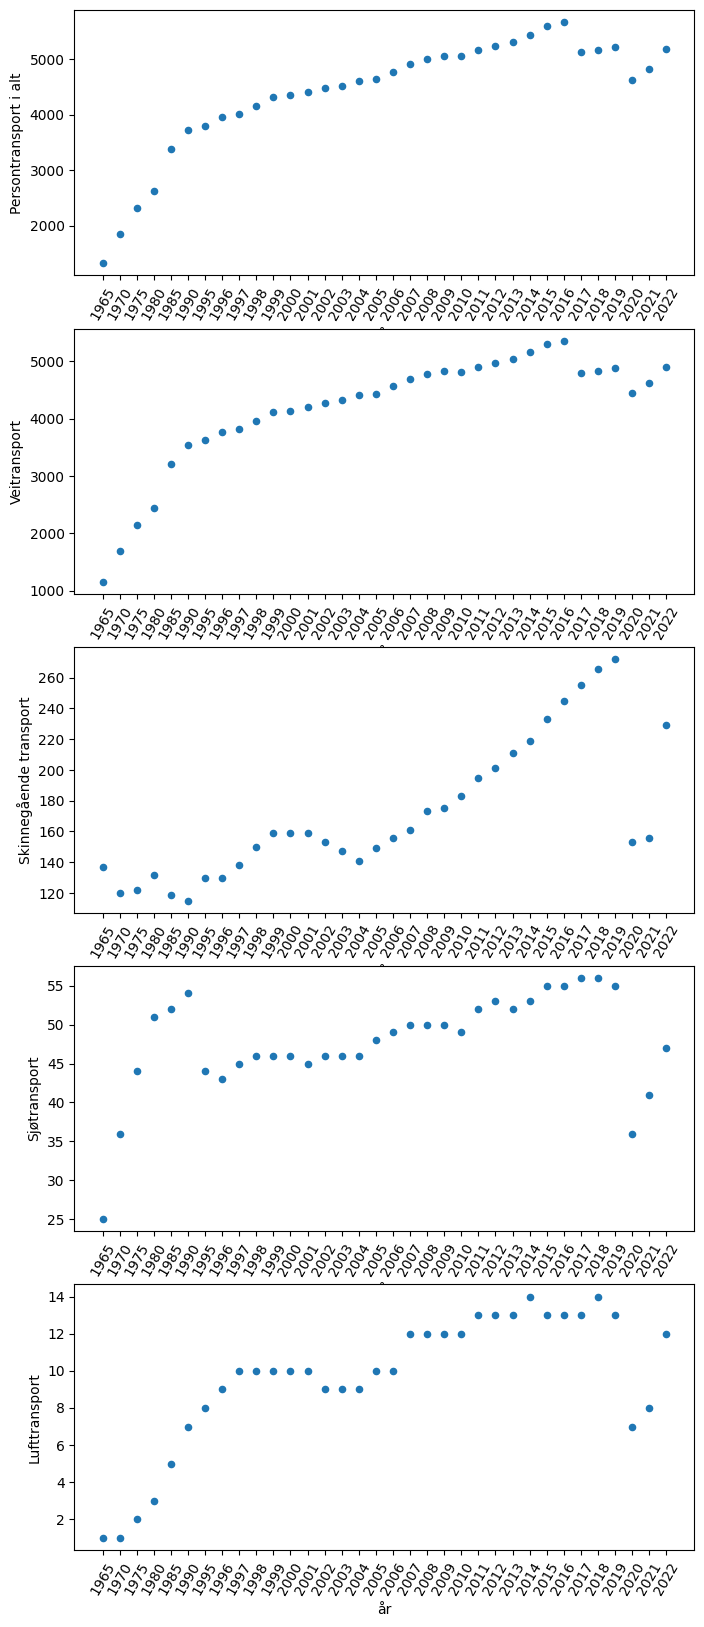

In [42]:
fig, ax = plt.subplots(5,1, figsize = (8, 20))
df_pass.reset_index().plot(ax = ax[0], kind='scatter',x='år', y='Persontransport i alt', rot=60)
df_pass.reset_index().plot(ax = ax[1], kind='scatter',x='år', y='Veitransport', rot=60)
df_pass.reset_index().plot(ax = ax[2], kind='scatter',x='år', y='Skinnegående transport', rot=60)
df_pass.reset_index().plot(ax = ax[3], kind='scatter',x='år', y='Sjøtransport', rot=60)
df_pass.reset_index().plot(ax = ax[4], kind='scatter',x='år', y='Lufttransport', rot=60)

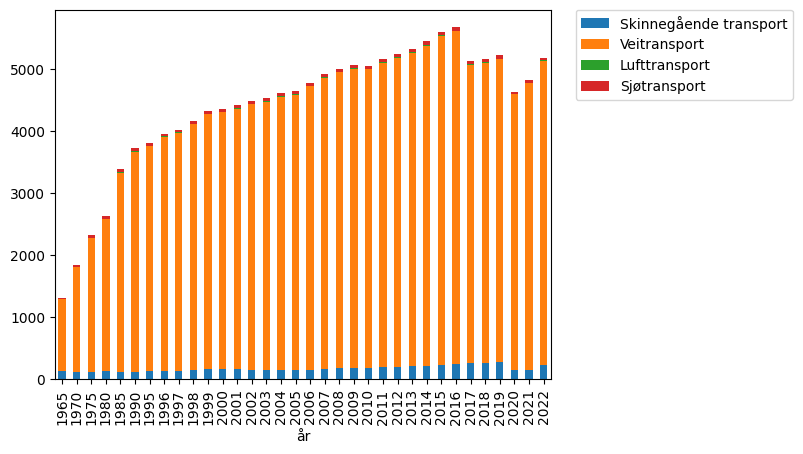

In [11]:
df_pass[["Skinnegående transport","Veitransport","Lufttransport", "Sjøtransport"]].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

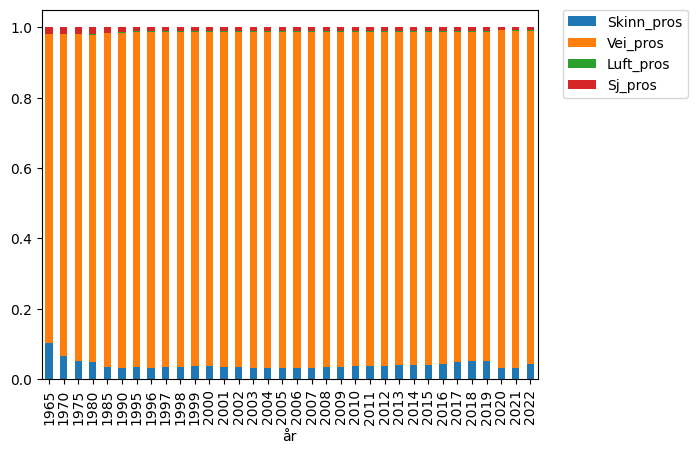

In [27]:
df_pass["Skinn_pros"]=df_pass["Skinnegående transport"]/df_pass['Persontransport i alt']
df_pass["Vei_pros"]=df_pass["Veitransport"]/df_pass['Persontransport i alt']
df_pass["Luft_pros"]=df_pass["Lufttransport"]/df_pass['Persontransport i alt']
df_pass["Sj_pros"]=df_pass["Sjøtransport"]/df_pass['Persontransport i alt']

df_pass.head()
df_pass[["Skinn_pros", "Vei_pros", "Luft_pros", "Sj_pros"]].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

<Axes: xlabel='år', ylabel='Lufttransport'>

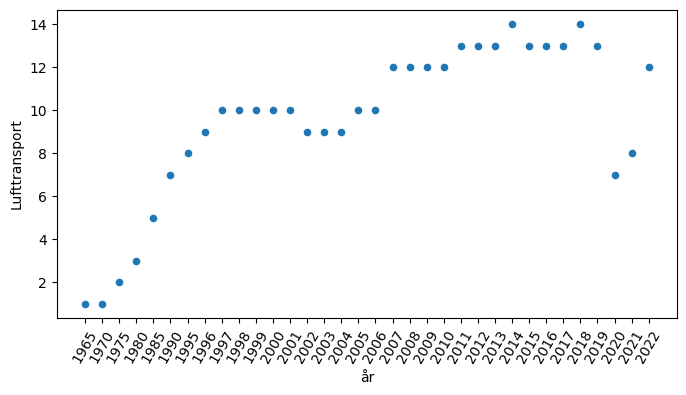

### Personkm

In [29]:
df_pkm=df[df["statistikkvariabel"]=="Passasjerkilometer (mill.)"]
df_pkm=df_pkm.pivot(index='år', columns='transport', values='value')

In [30]:
df_pkm.head()

transport,Alle togstrekninger,Andre jernbaner,Annen rutefart,Bilferjeruter,Drosjer,Forstadsbaner og sporveier,Lufttransport,Lufttransport innenriksreiser,Lufttransport mellom norske flyplasser som del av utenlandsreise,"Motorsykler, mopeder",Norges Statsbaner,Personbiler,Persontransport i alt,Rutebusser,Sjøtransport,Skinnegående transport,Utleiebiler mv.,Veitransport
år,,,,,,,,,,,,,,,,,,
1965,NaN,0.0,456.0,116.0,398.0,391.0,280.0,NaN,NaN,798.0,1629.0,10053.0,17384.0,3263.0,572.0,2020.0,0.0,14512.0
1970,NaN,0.0,436.0,195.0,429.0,432.0,632.0,NaN,NaN,695.0,1498.0,17781.0,25824.0,3726.0,631.0,1930.0,0.0,22631.0
1975,NaN,0.0,385.0,275.0,475.0,444.0,1021.0,NaN,NaN,604.0,1827.0,26311.0,35305.0,3963.0,660.0,2271.0,0.0,31353.0
1980,NaN,0.0,339.0,321.0,625.0,501.0,1475.0,NaN,NaN,501.0,2250.0,30436.0,40705.0,4257.0,660.0,2751.0,0.0,35819.0
1985,NaN,0.0,320.0,323.0,461.0,455.0,2147.0,NaN,NaN,629.0,2112.0,36884.0,47656.0,3948.0,643.0,2567.0,377.0,42299.0


In [31]:
df_pkm.describe()

transport,Alle togstrekninger,Andre jernbaner,Annen rutefart,Bilferjeruter,Drosjer,Forstadsbaner og sporveier,Lufttransport,Lufttransport innenriksreiser,Lufttransport mellom norske flyplasser som del av utenlandsreise,"Motorsykler, mopeder",Norges Statsbaner,Personbiler,Persontransport i alt,Rutebusser,Sjøtransport,Skinnegående transport,Utleiebiler mv.,Veitransport
count,4.000000,30.000000,34.000000,34.000000,34.000000,34.000000,34.000000,16.000000,16.00000,34.000000,30.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2577.250000,223.833333,552.617647,305.264706,519.647059,584.058824,4146.352941,4273.250000,955.50000,1162.529412,2501.366667,49179.029412,64316.705882,3974.323529,857.852941,3291.882353,1185.176471,56020.705882
std,945.319479,170.275453,133.989600,51.298478,87.159861,174.897362,1574.132736,636.299458,434.02427,340.406463,424.007847,12159.661241,15268.087073,403.098508,168.637882,757.546989,628.433187,13050.199250
min,1779.000000,0.000000,307.000000,116.000000,312.000000,381.000000,280.000000,2499.000000,334.00000,501.000000,1498.000000,10053.000000,17384.000000,2841.000000,533.000000,1930.000000,0.000000,14512.000000
25%,1793.250000,0.000000,456.000000,286.000000,445.750000,460.750000,3625.000000,4255.500000,600.50000,861.000000,2273.000000,46382.000000,61023.250000,3794.250000,735.250000,2764.000000,1002.750000,53160.000000
50%,2427.000000,239.500000,555.500000,313.500000,538.500000,513.000000,4275.500000,4451.000000,947.00000,1186.500000,2538.000000,52503.000000,67461.500000,4111.000000,847.500000,3286.000000,1321.000000,59627.000000
75%,3211.000000,370.500000,628.750000,341.750000,582.250000,652.750000,5453.500000,4599.750000,1300.25000,1502.000000,2673.750000,56247.750000,74440.750000,4254.750000,978.000000,3698.000000,1569.500000,64020.000000
max,3676.000000,439.000000,832.000000,362.000000,665.000000,1001.000000,5918.000000,4896.000000,1608.00000,1604.000000,3250.000000,62974.000000,82496.000000,4550.000000,1191.000000,4680.000000,2329.000000,71200.000000


<Axes: xlabel='år', ylabel='Persontransport i alt'>

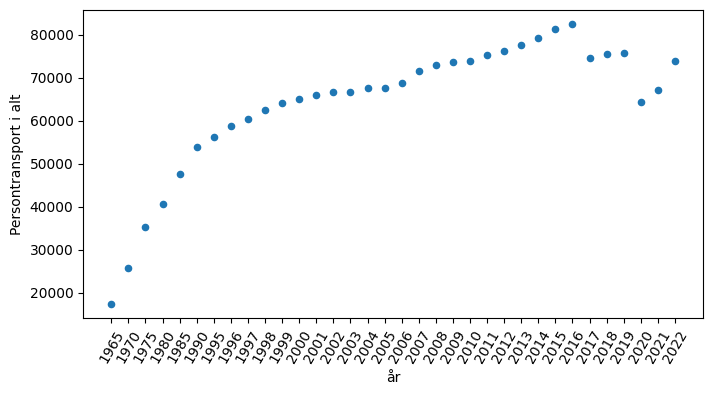

In [32]:
df_pkm.reset_index().plot(kind='scatter',x='år', y='Persontransport i alt', figsize=(8,4), rot=60)

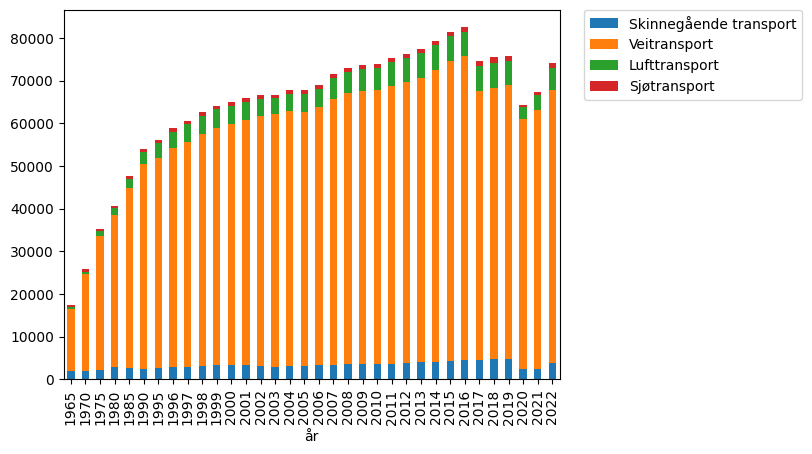

In [33]:
df_pkm[["Skinnegående transport","Veitransport","Lufttransport", "Sjøtransport"]].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

## Innenlandsk godstransport 2010-2022

In [ ]:
POST_URL = 'https://data.ssb.no/api/v0/no/table/11403'

{
  "query": [
    {
      "code": "Godstransport",
      "selection": {
        "filter": "all",
        "values": [
          "*"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "all",
        "values": [
          "*"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "all",
        "values": [
          "*"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


## Innenlandsk godstransport 1965-2014

Text(0.5, 1.0, 'Monthly Temperatures in a year')

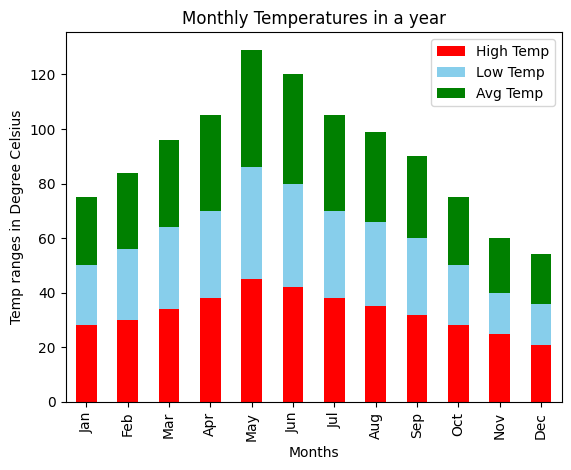

In [21]:
# create DataFrame
df = pd.DataFrame({'High Temp': [28, 30, 34, 38, 45, 42,
                                 38, 35, 32, 28, 25, 21],
                   'Low Temp': [22, 26, 30, 32, 41, 38,
                                32, 31, 28, 22, 15, 15],
                   'Avg Temp': [25, 28, 32, 35, 43, 40, 
                                35, 33, 30, 25, 20, 18]},
                  index=['Jan', 'Feb', 'Mar', 'Apr', 'May',
                         'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                         'Nov', 'Dec'])
 
 
# create stacked bar chart for monthly temperatures
df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
 
# labels for x & y axis
plt.xlabel('Months')
plt.ylabel('Temp ranges in Degree Celsius')
 
# title of plot
plt.title('Monthly Temperatures in a year')

In [22]:
df

,High Temp,Low Temp,Avg Temp
Jan,28,22,25
Feb,30,26,28
Mar,34,30,32
Apr,38,32,35
May,45,41,43
Jun,42,38,40
Jul,38,32,35
Aug,35,31,33
Sep,32,28,30
Oct,28,22,25
